In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
loading and viewing data

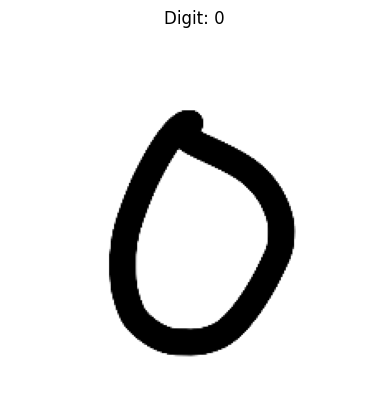

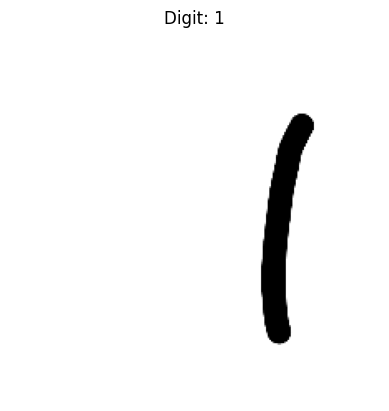

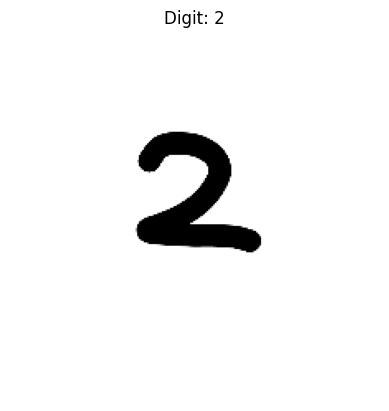

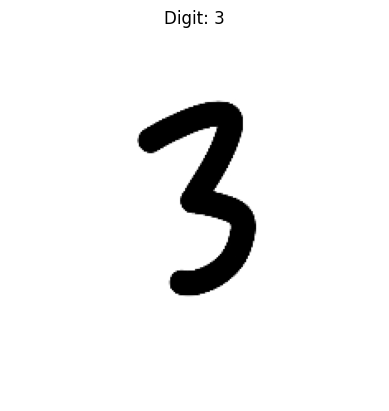

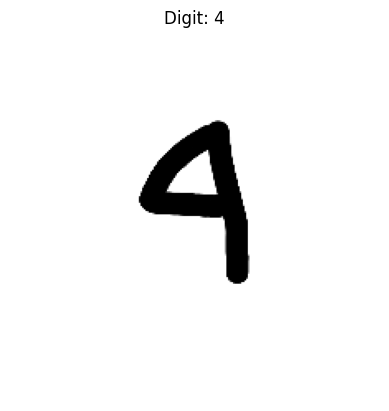

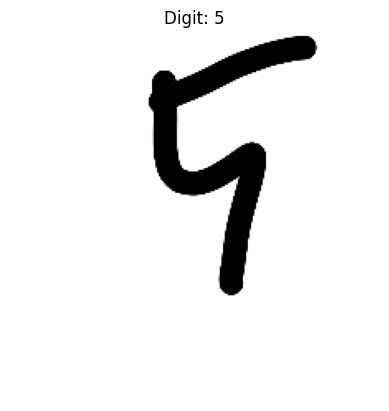

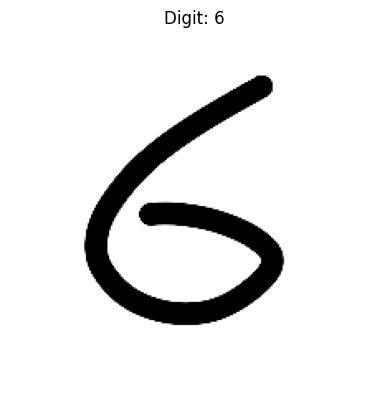

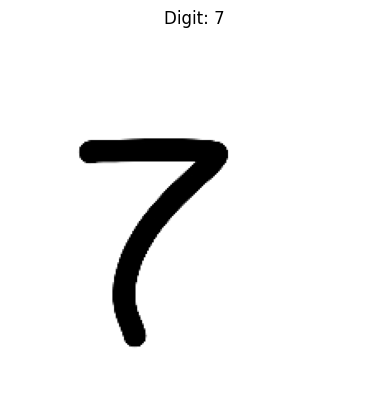

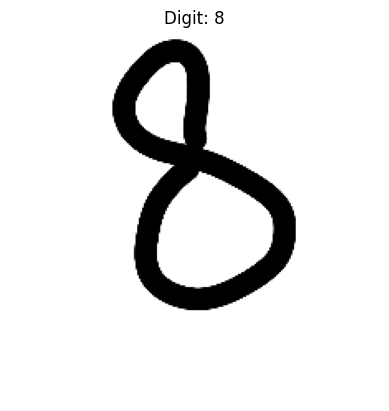

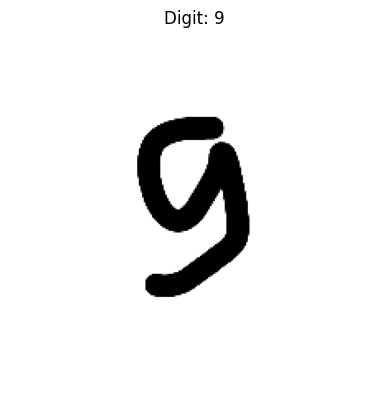

In [7]:
import os
import matplotlib.pyplot as plt
import cv2

base_path = "../input/handwriting-digit-0-9/handDigitDataset"

for digit in sorted(os.listdir(base_path)):
    digit_path = os.path.join(base_path, digit)
    if not os.path.isdir(digit_path):
        continue  # skip any stray files

    img_list = os.listdir(digit_path)
    if not img_list:
        continue

    # Pick first image in this digit folder
    img_path = os.path.join(digit_path, img_list[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis("off")
        plt.show()
    else:
        print(f"❌ Failed to load image: {img_path}")


preparing image dataset for training 

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load images from directory and split into train/val
img_size = (28, 28)

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,
    validation_split=0.1,
    subset="training",
    seed=42,
    image_size=img_size,
    color_mode='grayscale',
    batch_size=32,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,
    validation_split=0.1,
    subset="validation",
    seed=42,
    image_size=img_size,
    color_mode='grayscale',
    batch_size=32,
    label_mode="categorical"
)

# Normalize pixel values
normalizer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalizer(x), y))
val_ds = val_ds.map(lambda x, y: (normalizer(x), y))


2025-07-06 11:08:03.212516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751800083.500258      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751800083.579340      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 13996 files belonging to 10 classes.
Using 12597 files for training.


2025-07-06 11:08:26.716157: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 13996 files belonging to 10 classes.
Using 1399 files for validation.


In [ ]:
building and training model

In [9]:
model = Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.5459 - loss: 1.3396 - val_accuracy: 0.9478 - val_loss: 0.1768
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9414 - loss: 0.1930 - val_accuracy: 0.9600 - val_loss: 0.1123
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9682 - loss: 0.1051 - val_accuracy: 0.9757 - val_loss: 0.0885
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9767 - loss: 0.0745 - val_accuracy: 0.9757 - val_loss: 0.0765
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9782 - loss: 0.0669 - val_accuracy: 0.9836 - val_loss: 0.0624
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9854 - loss: 0.0467 - val_accuracy: 0.9843 - val_loss: 0.0571
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9896 - loss: 0.0342 - val_accuracy: 0.9843 - val_loss: 0.0518
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9922 - loss: 0.0281 - val_accuracy: 0.97

saving and downloading

In [11]:
model.save("digit_model.h5")
